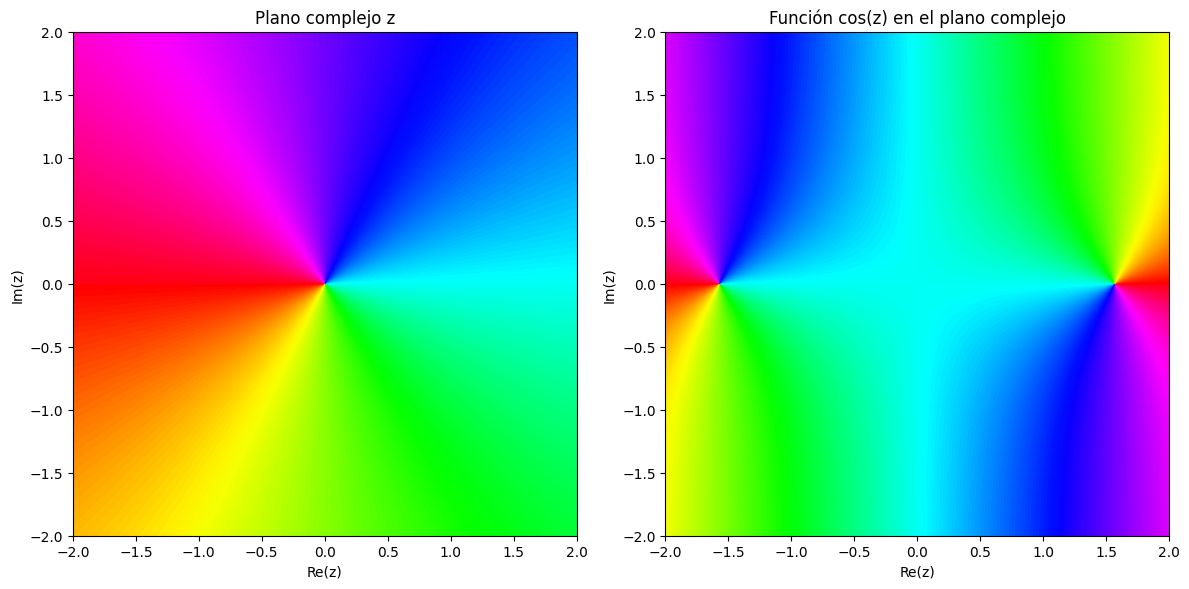

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Crear una malla de puntos en el plano complejo
x = np.linspace(-2, 2, 500)
y = np.linspace(-2, 2, 500)
x, y = np.meshgrid(x, y)
z = x + 1j * y

# Calcular el coseno complejo de z
cos_z = np.cos(z)

# Preparar las figuras
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Primera gráfica: plano complejo original
axes[0].imshow(
    np.angle(z),
    extent=[-2, 2, -2, 2],
    origin="lower",
    cmap="hsv"
)
axes[0].set_title("Plano complejo z")
axes[0].set_xlabel("Re(z)")
axes[0].set_ylabel("Im(z)")

# Segunda gráfica: coseno complejo
axes[1].imshow(
    np.angle(cos_z),
    extent=[-2, 2, -2, 2],
    origin="lower",
    cmap="hsv"
)
axes[1].set_title("Función cos(z) en el plano complejo")
axes[1].set_xlabel("Re(z)")
axes[1].set_ylabel("Im(z)")

# Mostrar las gráficas
plt.tight_layout()
plt.show()


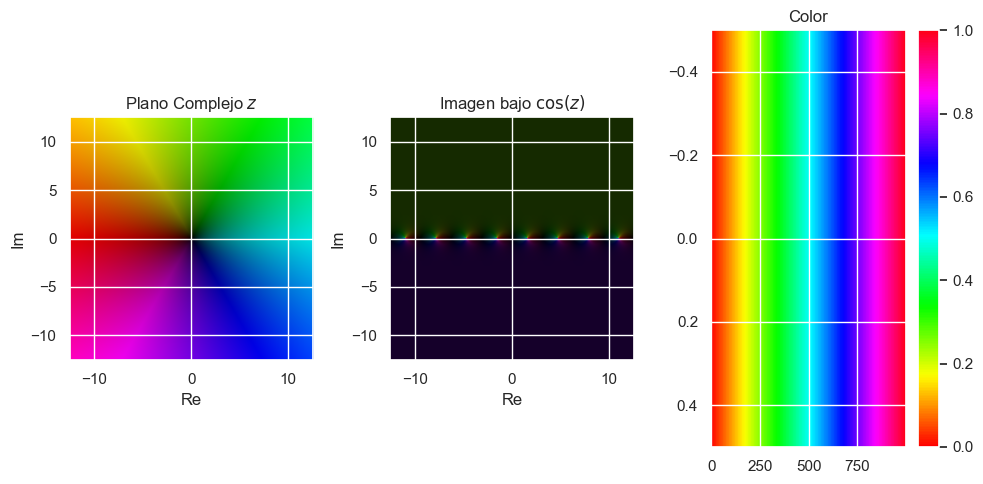

'\nfig, axs = plt.subplots(1, 2, figsize=(16, 8))\n\n# Gráfica del plano complejo original\naxs[0].imshow(img_z, extent=(re_min, re_max, im_min, im_max))\naxs[0].set_title("Plano Complejo $z$")\naxs[0].set_xlabel("Re")\naxs[0].set_ylabel("Im")\naxs[0].set_aspect(\'equal\')\n\n# Gráfica de la imagen bajo $\\cos(z)$\naxs[1].imshow(img_cos_z, extent=(re_min, re_max, im_min, im_max))\naxs[1].set_title("Imagen bajo $\\cos(z)$")\naxs[1].set_xlabel("Re")\naxs[1].set_ylabel("Im")\naxs[1].set_aspect(\'equal\')\n\nplt.tight_layout()\nplt.show()\n'

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors  # Importar correctamente el submódulo colors

def domain_coloring(Z, func=lambda z: z):
    """
    Aplica Domain Coloring a una función compleja.
    
    Parameters:
        Z (ndarray): Malla del plano complejo.
        func (callable): Función compleja a visualizar.
        
    Returns:
        RGB image representing the domain coloring.
    """
    W = func(Z)
    # Calcula el argumento y la magnitud
    arg = np.angle(W)
    mag = np.abs(W)
    
    # Normaliza la magnitud para el brillo
    # Usamos log para manejar una amplia gama de magnitudes
    log_mag = np.log1p(mag)
    norm_log_mag = log_mag / np.max(log_mag)
    
    # Hue representa el argumento, Saturation fija
    hue = (arg + np.pi) / (2 * np.pi)  # Normalizado entre 0 y 1
    saturation = np.ones_like(hue)
    value = norm_log_mag
    
    # Combina los componentes HSV y convierte a RGB
    hsv = np.stack((hue, saturation, value), axis=-1)
    rgb = mcolors.hsv_to_rgb(hsv)  # Usar matplotlib.colors en lugar de plt.colors
    
    return rgb

# Define el rango del plano complejo
re_min, re_max = -4 * np.pi, 4 * np.pi
im_min, im_max = -4 * np.pi, 4 * np.pi
resolution = 800  # Mayor resolución para mayor detalle

# Crea una malla de puntos en el plano complejo
re = np.linspace(re_min, re_max, resolution)
im = np.linspace(im_min, im_max, resolution)
Re, Im = np.meshgrid(re, im)
Z = Re + 1j * Im

# Genera las imágenes de Domain Coloring
img_z = domain_coloring(Z, func=lambda z: z)
img_cos_z = domain_coloring(Z, func=np.tan)

# Crea las gráficas (incluyendo una barras de color como tercera imagen)
fig, axs = plt.subplots(1, 3, figsize=(10, 5))

# Gráfica del plano complejo original
axs[0].imshow(img_z, extent=(re_min, re_max, im_min, im_max))
axs[0].set_title("Plano Complejo $z$")
axs[0].set_xlabel("Re")
axs[0].set_ylabel("Im")
axs[0].set_aspect('equal')

# Gráfica de la imagen bajo $\cos(z)$

axs[1].imshow(img_cos_z, extent=(re_min, re_max, im_min, im_max))
axs[1].set_title("Imagen bajo $\cos(z)$")
axs[1].set_xlabel("Re")
axs[1].set_ylabel("Im")
axs[1].set_aspect('equal')

# Barras de color
cbar = axs[2].imshow(np.linspace(0, 1, 1000).reshape(1, -1), cmap='hsv', aspect='auto')
axs[2].set_title("Color")
fig.colorbar(cbar, ax=axs[2], orientation='vertical')

plt.tight_layout()
plt.show()


'''
fig, axs = plt.subplots(1, 2, figsize=(16, 8))

# Gráfica del plano complejo original
axs[0].imshow(img_z, extent=(re_min, re_max, im_min, im_max))
axs[0].set_title("Plano Complejo $z$")
axs[0].set_xlabel("Re")
axs[0].set_ylabel("Im")
axs[0].set_aspect('equal')

# Gráfica de la imagen bajo $\cos(z)$
axs[1].imshow(img_cos_z, extent=(re_min, re_max, im_min, im_max))
axs[1].set_title("Imagen bajo $\cos(z)$")
axs[1].set_xlabel("Re")
axs[1].set_ylabel("Im")
axs[1].set_aspect('equal')

plt.tight_layout()
plt.show()
'''